# Date_Range

In [1]:
import pandas as pd
df = pd.read_csv("aapl_no_dates.csv")            # Dataset with no date
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [2]:
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B') # Freq='B' for business date. Exclude off day
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [4]:
df.set_index(rng, inplace=True)                             #indexing date
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


### Finding missing Dates

In [5]:
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='D')

In [6]:
daily_index.difference(df.index)       # These are missing dates

DatetimeIndex(['2016-06-04', '2016-06-05', '2016-06-11', '2016-06-12',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-06-26'],
              dtype='datetime64[ns]', freq=None)

### Benefits of having DatetimeIndex

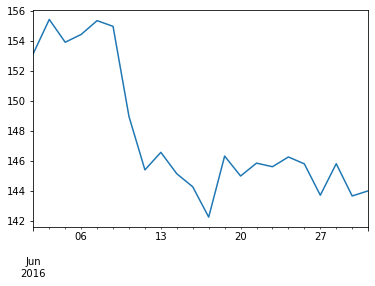

In [7]:
%matplotlib inline
df.Close.plot()                       # Easy visulaization

In [8]:
df["2016-06-01":"2016-06-10"]['Close'].mean()  # Easy Calculation

152.72125

### asfreq

In [9]:
df.index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [10]:
df.asfreq('D',method='pad')     # fillup missing dates "D" parameter # method='pad' is forward fill values

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [11]:
df.asfreq('W',method='pad') # we can also use hourly,minutely, yearly...

,Open,High,Low,Close,Volume
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-12,145.74,146.09,142.51,145.42,72307330
2016-06-19,143.66,146.74,143.66,146.34,32541404
2016-06-26,147.17,148.28,145.38,145.82,25692361


### Period arg

In [12]:
rng = pd.date_range('1/1/2011', periods=72, freq='H') # 72 periods of hour
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

In [13]:
import numpy as np
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng) # unit or integrate test purpose with fake numbers(0-10)
ts.head(20)

2011-01-01 00:00:00    1
2011-01-01 01:00:00    9
2011-01-01 02:00:00    7
2011-01-01 03:00:00    4
2011-01-01 04:00:00    3
2011-01-01 05:00:00    4
2011-01-01 06:00:00    8
2011-01-01 07:00:00    2
2011-01-01 08:00:00    1
2011-01-01 09:00:00    9
2011-01-01 10:00:00    6
2011-01-01 11:00:00    3
2011-01-01 12:00:00    5
2011-01-01 13:00:00    0
2011-01-01 14:00:00    9
2011-01-01 15:00:00    2
2011-01-01 16:00:00    6
2011-01-01 17:00:00    1
2011-01-01 18:00:00    1
2011-01-01 19:00:00    5
Freq: H, dtype: int32